[10, 65, 130, 177, 245, 308, 373, 438, 503, 569, 632, 694, 753, 811, 870, 921]


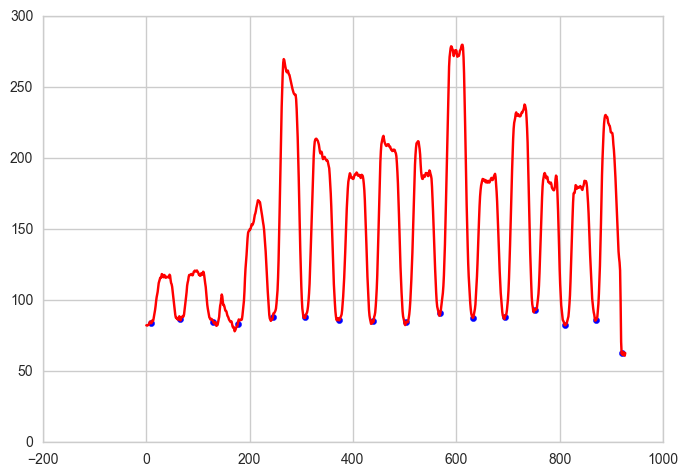

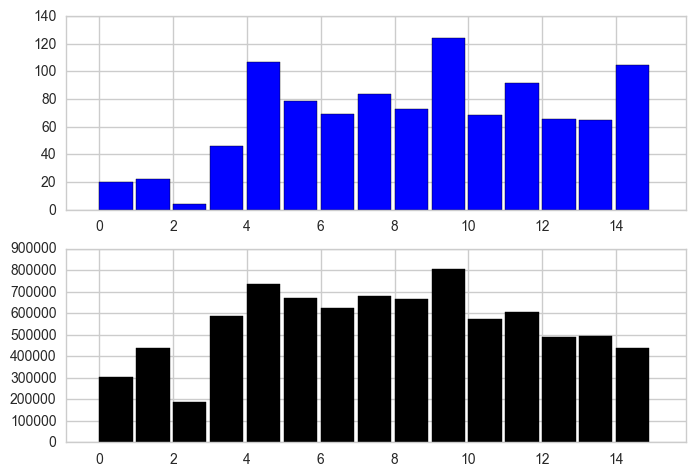

[19.958647058823516,
 21.951344262295081,
 4.3842209302325443,
 46.368890625000006,
 107.07041525423726,
 78.898065573770509,
 68.990713114754058,
 83.605598360655705,
 72.84209677419355,
 124.42001694915251,
 68.200275862068992,
 91.732409090909101,
 65.662259259259287,
 64.567899999999952,
 104.82832978723405]

In [121]:
   #import data and load libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.integrate import simps
from numpy import trapz
import seaborn as sns
import os

folder='example.csv'
inputfile ='gelX_protein.csv'
outputfile='quant_' + inputfile
wave=np.arange(10,20) # usually 10,20 for 15 well gel
measure_wb(folder,inputfile, outputfile, wave)

[1]
[ 0.54266685  1.          0.58346533  1.77198023  1.61497853  1.17992975
  1.5305369   1.4470864   1.65426359  1.82146608  1.77272713  1.55065843
  1.2427825   1.20530298  1.00567665]


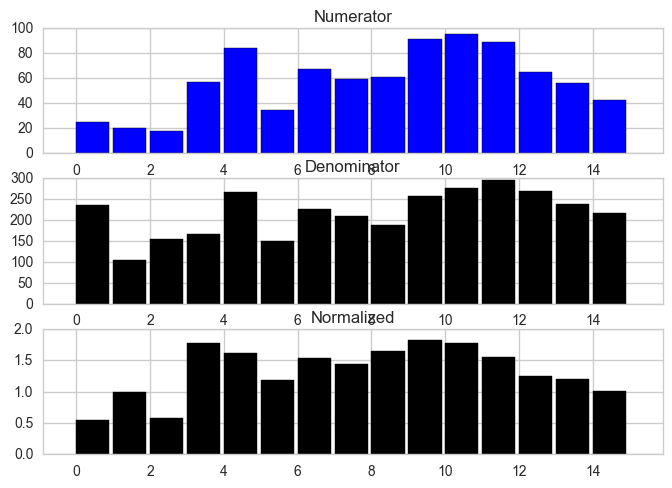

In [129]:
rawX = 'gelX_PROTEIN.csv'
rawN = 'gelX_LOADING_CONTROLS.csv'
quantX = folder + '\\' + 'quant_' + rawX
quantN = folder + '\\' + 'quant_' + rawN

numerator = np.genfromtxt(quantX, delimiter=',', skip_header=0, skip_footer=0, names=['y'])
denominator = np.genfromtxt(quantN, delimiter=',', skip_header=0, skip_footer=0, names=['y'])
numerator = np.array(numerator, dtype=float)
denominator = np.array(denominator, dtype=float)

norm = numerator/denominator
avg_idx =[1] # lanes to use for in-membrane normalization
norm = norm / np.mean (norm[avg_idx])
print avg_idx
print norm

a=len(norm)
fig = plt.figure()
ax1 = fig.add_subplot(311)
ind = np.arange(a)                # the x locations for the groups
width = 0.9                      # the width of the bars

rects1 = ax1.bar(ind, numerator, width, color='blue')
ax1.set_xlim(-width,len(ind)+width)
ax1.set_title('Numerator')

ax2=fig.add_subplot(312)
rects2 = ax2.bar(ind, denominator, width, color='black')
ax2.set_xlim(-width,len(ind)+width)
ax2.set_title('Denominator')


ax3=fig.add_subplot(313)
rects3 = ax3.bar(ind, norm, width, color='black')
ax3.set_xlim(-width,len(ind)+width)
ax3.set_title('Normalized')

plt.show()

outputX = folder + '\\' + 'norm_' + rawX
np.savetxt(outputX,norm)

In [114]:
def measure_wb (folder, inputfile, outputfile, wave):

    sns.set_style("whitegrid")
    inputX = folder + '\\' + inputfile
    data = np.genfromtxt(inputX, delimiter=',', skip_header=1,
                     skip_footer=0, names=['x','y'])
    
    #find peaks and plot
    peaks = signal.find_peaks_cwt(1/data['y'], wave)
    ypeaks = data['y'][peaks]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(data['y'], color='r', label='the data')
    ax.scatter(peaks,ypeaks, color='b')
    plt.show()
    
    # calculate areas of each lane

    area = []  # median value
    area2 = [] # integral value


    a = len(peaks)
    for x in np.arange(0, a-1):
        y = np.mean(data['y'][peaks[x]+2:peaks[x+1]-2])#, dx=peaks[x+1]-peaks[x])
        yb=np.median([data['y'][i] for i in [peaks[x],peaks[x+1]]])#, dx=peaks[x+1]-peaks[x])
        area.append(y-yb)
        z= simps(data['y'][peaks[x]:peaks[x+1]], dx=peaks[x+1]-peaks[x])
        zb=simps([data['y'][i] for i in [peaks[x],peaks[x+1]]], dx=peaks[x+1]-peaks[x])
        area2.append(z-zb)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ind = np.arange(a-1)                # the x locations for the groups
    width = 0.9                      # the width of the bars

    rects1 = ax1.bar(ind, area, width, color='blue')
    ax1.set_xlim(-width,len(ind)+width)
    #ax1.set_xticks(ind+width)

    ax2=fig.add_subplot(212)
    rects2 = ax2.bar(ind, area2, width, color='black')
    ax2.set_xlim(-width,len(ind)+width)
    #ax2.set_xticks(ind+width)

    plt.show()
    
    outputX = folder + '\\' + outputfile
    np.savetxt(outputX,area2)
    return area2